# G2M insight for Cab Investment firm

XYX wants to invest in Cab industry as per Go-To-Market strategy. XYZ needs to indenitfy the right company to make investment. 

## Dataset information

Time period of data - 31/02/2016 - 31/12/2018
<br/>
Cab_Data - Transaction for 2 cab companies
<br />
Customer_ID - Customer's demographic details
<br />
Transaction_ID - Transaction to Customer Mapping and Payment mode
<br />City - US city population and number of cab users

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sb

%matplotlib inline

## Reading the Data Files

In [ ]:
cabData = pd.read_csv("DataSets/Cab_Data.csv")
customerData = pd.read_csv("DataSets/Customer_ID.csv")
transactionData = pd.read_csv("DataSets/Transaction_ID.csv")
cityData = pd.read_csv("DataSets/City.csv")

In [ ]:
cabData.head()

In [ ]:
customerData.head()

In [ ]:
transactionData.head()

In [ ]:
cityData.head()

In [ ]:
print(cabData.info())
print(customerData.info())
print(transactionData.info())
print(cityData.info())

#### The Cab Data date format is not in the Year-Month-Date format. Adding a new column with the correct format.

In [ ]:
cabData["Travel Date"] = pd.TimedeltaIndex(cabData["Date of Travel"].astype(int), unit='d') + datetime(1900, 1, 1)
cabData.head()

## Merging dateframes

In [ ]:
customerMerge = pd.merge(customerData, transactionData, on='Customer ID')
cityMerge = pd.merge(cabData, cityData, on='City')
df = pd.merge(cityMerge, customerMerge, on='Transaction ID')

In [ ]:
# df.to_csv('completeData.csv') 

In [ ]:
df.head()

In [ ]:
pd.isnull(df).sum(axis=0)

In [ ]:
df.info()

In [ ]:
df.corr()

In [ ]:
plt.figure(figsize=(40,30))

ax = sb.countplot(df['City'], hue="Company", data=df, palette=["#FFC0CB","#FFFAA0"])
ax.set_title("Total Rides by City", fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=14)
plt.show()

In [ ]:
plt.figure(figsize=(15, 15))
plt.title("Distribution of Total Rides by City")
df["City"].value_counts().plot(kind = 'pie')
plt.axes().set_ylabel('')

## Profit

In [ ]:
df["Profit"] = df["Price Charged"] - df["Cost of Trip"]
df.head()

### Profit comparisons for Pink vs Yellow Cab

In [ ]:
profitData = df.groupby("Company").mean()
profitData.head()

In [ ]:
companyData = df.groupby("Company").count()


companyData.head()

In [ ]:
companyData.info()

In [ ]:
plt.figure(figsize=(10, 10))
plt.title("Total Users by Company")
plt.pie(companyData["Users"], labels=companyData.index, autopct='%1.1f%%', startangle=90, colors=["#FFC0CB","#FFFAA0"])
plt.show()

In [ ]:
df.plot(x="Company", y=["Profit", "KM Travelled"])
plt.show()

In [ ]:
pinkCab = df[df["Company"] == "Pink Cab"]
pinkCab.head()

In [ ]:
yellowCab = df[df["Company"] == "Yellow Cab"]
yellowCab.head()

In [ ]:
figure, (ax1, ax2) = plt.subplots(1, 2)
# For Pink Cab
ax1.plot(pinkCab["KM Travelled"], pinkCab["Profit"])
ax1.set_title("Pink Cab")
  
# For Yellow Cab
ax2.plot(yellowCab["KM Travelled"], yellowCab["Profit"])
ax2.set_title("Yellow Cab")

plt.show()

In [ ]:
dummy=pinkCab.groupby("KM Travelled")


In [ ]:
dummy.head()

## Profit analysis per KM

In [ ]:
label = ["{0} - {1}".format(i, i + 9) for i in range(0, 50, 10)]

df["KM Range"] = pd.cut(df['KM Travelled'], range(0,55, 10), right=False, labels=label)

pivot_KM_profit = df.pivot_table(index = ["KM Range"], columns = 'Company', values = 'Profit', aggfunc = 'sum')

pivot_KM_profit.fillna(0, inplace=True)
ax = pivot_KM_profit.plot.barh(stacked = True, figsize = (15,10), color=["#FFC0CB","#FFFAA0"])
labels = []
for j in pivot_KM_profit.columns:
    for i in pivot_KM_profit.index:
        if ((j == 0) and (pivot_KM_profit.loc[i][j] < 10) and (pivot_KM_profit.loc[i][j] < sum(pivot_KM_profit.loc[i]))):
            label = ""
        else:                                                                                                                       
            label = str(round((pivot_KM_profit.loc[i][j]/sum(pivot_KM_profit.loc[i]))*100,1)) + "% "
        labels.append(label)


plt.title("PROFIT ANALISYS PER KM ")
plt.show()


## Cost of Trip and Price Charged Comparison

In [ ]:
label_Cost = ["{0} - {1}".format(i, i + 49) for i in range(0, 700, 50)]

df["Cost of Trip Grouped"] = pd.cut(df['Cost of Trip'], range(0,710, 50), right=False, labels=label_Cost)
df.head()

In [ ]:
pivotCostTripPrice = df.pivot_table(index = ["Cost of Trip Grouped"], columns = 'Company', values = 'Price Charged')

pivotCostTripPrice.fillna(0, inplace=True)
ax = pivotCostTripPrice.plot.barh(stacked = True, figsize = (15,10), color=["#FFC0CB","#FFFAA0"])

plt.title("Cost of Trip and Price Charged comparison")
plt.show()

In [ ]:
yellowCab.head()

## Cost of trip for Gender in both Company

In [ ]:
sb.catplot(x="Company", y="Cost of Trip", hue="Gender", kind="bar", data=df)

## Price Charged vs Cost of Trip for both Cab Companies

In [ ]:
sb.scatterplot(x="Price Charged", y="Cost of Trip", hue="Company", data=df, palette=["#FFC0CB","#FFFAA0"])

In [ ]:
sb.scatterplot(x="Price Charged", y="Cost of Trip", data=yellowCab, color="#FFFAA0")

In [ ]:
# sb.set(rc={'figure.figsize':(25,25)})
plt.figure(figsize=(30, 30))
fig, ax = plt.subplots()
ax.xaxis.set_ticks(np.arange(50, 1700, 50))
ax.yaxis.set_ticks(np.arange(100, 600, 20))
sb.scatterplot(x="Price Charged", y="Cost of Trip", data=pinkCab, s=15, color="pink")
fig.set_size_inches(25,15)
# ax.set(ylim=(1, 800))


In [ ]:
# sb.set(rc={'figure.figsize':(30,30)})
plt.figure(figsize=(30, 30), dpi=80)
fig, ax = plt.subplots()
sb.scatterplot(x="Price Charged", y="Cost of Trip", hue="Company", data=df, palette=["#FFC0CB","#FFFAA0"])
fig.set_size_inches(15,15)
ax.set(ylim=(1, 800))
ax.xaxis.set_ticks(np.arange(100, 2000, 80))
ax.yaxis.set_ticks(np.arange(100, 800, 20))

In [ ]:
fig, ax = plt.subplots()
sb.barplot(x='Cost of Trip Grouped', y='Price Charged', data=df, palette=["#FFC0CB","#FFFAA0"], hue='Company')
fig.set_size_inches(15,15)

In [ ]:
fig, ax = plt.subplots()
sb.barplot(x='Cost of Trip Grouped', y='KM Travelled', data=df, palette=["#FFC0CB","#FFFAA0"], hue='Company');
ax.yaxis.set_ticks(np.arange(0, 50, 5))
fig.set_size_inches(15,15)

## Hypothesis

In [ ]:
sb.pairplot(df, hue="Company")

## Regression Hypothesis 

### Regression Hypothesis for Price Charged and Profit for different Cab

In [ ]:
ax = sb.regplot(x="Price Charged", y="Profit", data=yellowCab, color="gold")

In [ ]:
ax = sb.regplot(x="Price Charged", y="Profit", data=pinkCab, color="pink")

### Regression Hypothesis for Price charged and Cost of Trip for both Cab company

In [ ]:
ax = sb.regplot(x="Price Charged", y="Cost of Trip", data=yellowCab, color="gold")

In [ ]:
ax = sb.regplot(x="Price Charged", y="Cost of Trip", data=pinkCab, color="pink")

## CONCLUSION

#### The following evaluations have been made regarding both Cab companies:

1. Most Users (~77%) prefer travelling with Yellow cab than Pink cab
2. There are users who take long distance trip with Yellow Cab
3. Yellow cab more profit than what is made by both companies
4. Yellow cab has relatively more profit each year
5. Yellow cab charged higher than Pink cab

#### Thus Yellow Cab company is good for XYZ company to invest and expand it's business


In [11]:
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Travel Date,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-01-10,"814,885","24,701",29290,Male,28,10813,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-01-08,"814,885","24,701",27703,Male,27,9237,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-01-04,"814,885","24,701",28712,Male,53,11242,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-01-09,"814,885","24,701",28020,Male,23,23327,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016-01-05,"814,885","24,701",27182,Male,33,8536,Card


In [12]:
pd.isnull(df).sum(axis=0)

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Travel Date           0
Population            0
Users                 0
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
Payment_Mode          0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  int64         
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Travel Date         359392 non-null  datetime64[ns]
 8   Population          359392 non-null  object        
 9   Users               359392 non-null  object        
 10  Customer ID         359392 non-null  int64         
 11  Gender              359392 non-null  object        
 12  Age                 359392 non-null  int64         
 13  Income (USD/Month)  359392 no

In [14]:
df.corr()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month)
Transaction ID,1.000000,0.993030,-0.001429,-0.052902,-0.003462,-0.016912,-0.001267,-0.001570
Date of Travel,0.993030,1.000000,-0.001621,-0.055559,-0.004484,-0.017653,-0.001346,-0.001368
KM Travelled,-0.001429,-0.001621,1.000000,0.835753,0.981848,0.000389,-0.000369,-0.000544
Price Charged,-0.052902,-0.055559,0.835753,1.000000,0.859812,-0.177324,-0.003084,0.003228
Cost of Trip,-0.003462,-0.004484,0.981848,0.859812,1.000000,0.003077,-0.000189,-0.000633
Customer ID,-0.016912,-0.017653,0.000389,-0.177324,0.003077,1.000000,-0.004735,-0.013608
Age,-0.001267,-0.001346,-0.000369,-0.003084,-0.000189,-0.004735,1.000000,0.003907
Income (USD/Month),-0.001570,-0.001368,-0.000544,0.003228,-0.000633,-0.013608,0.003907,1.000000


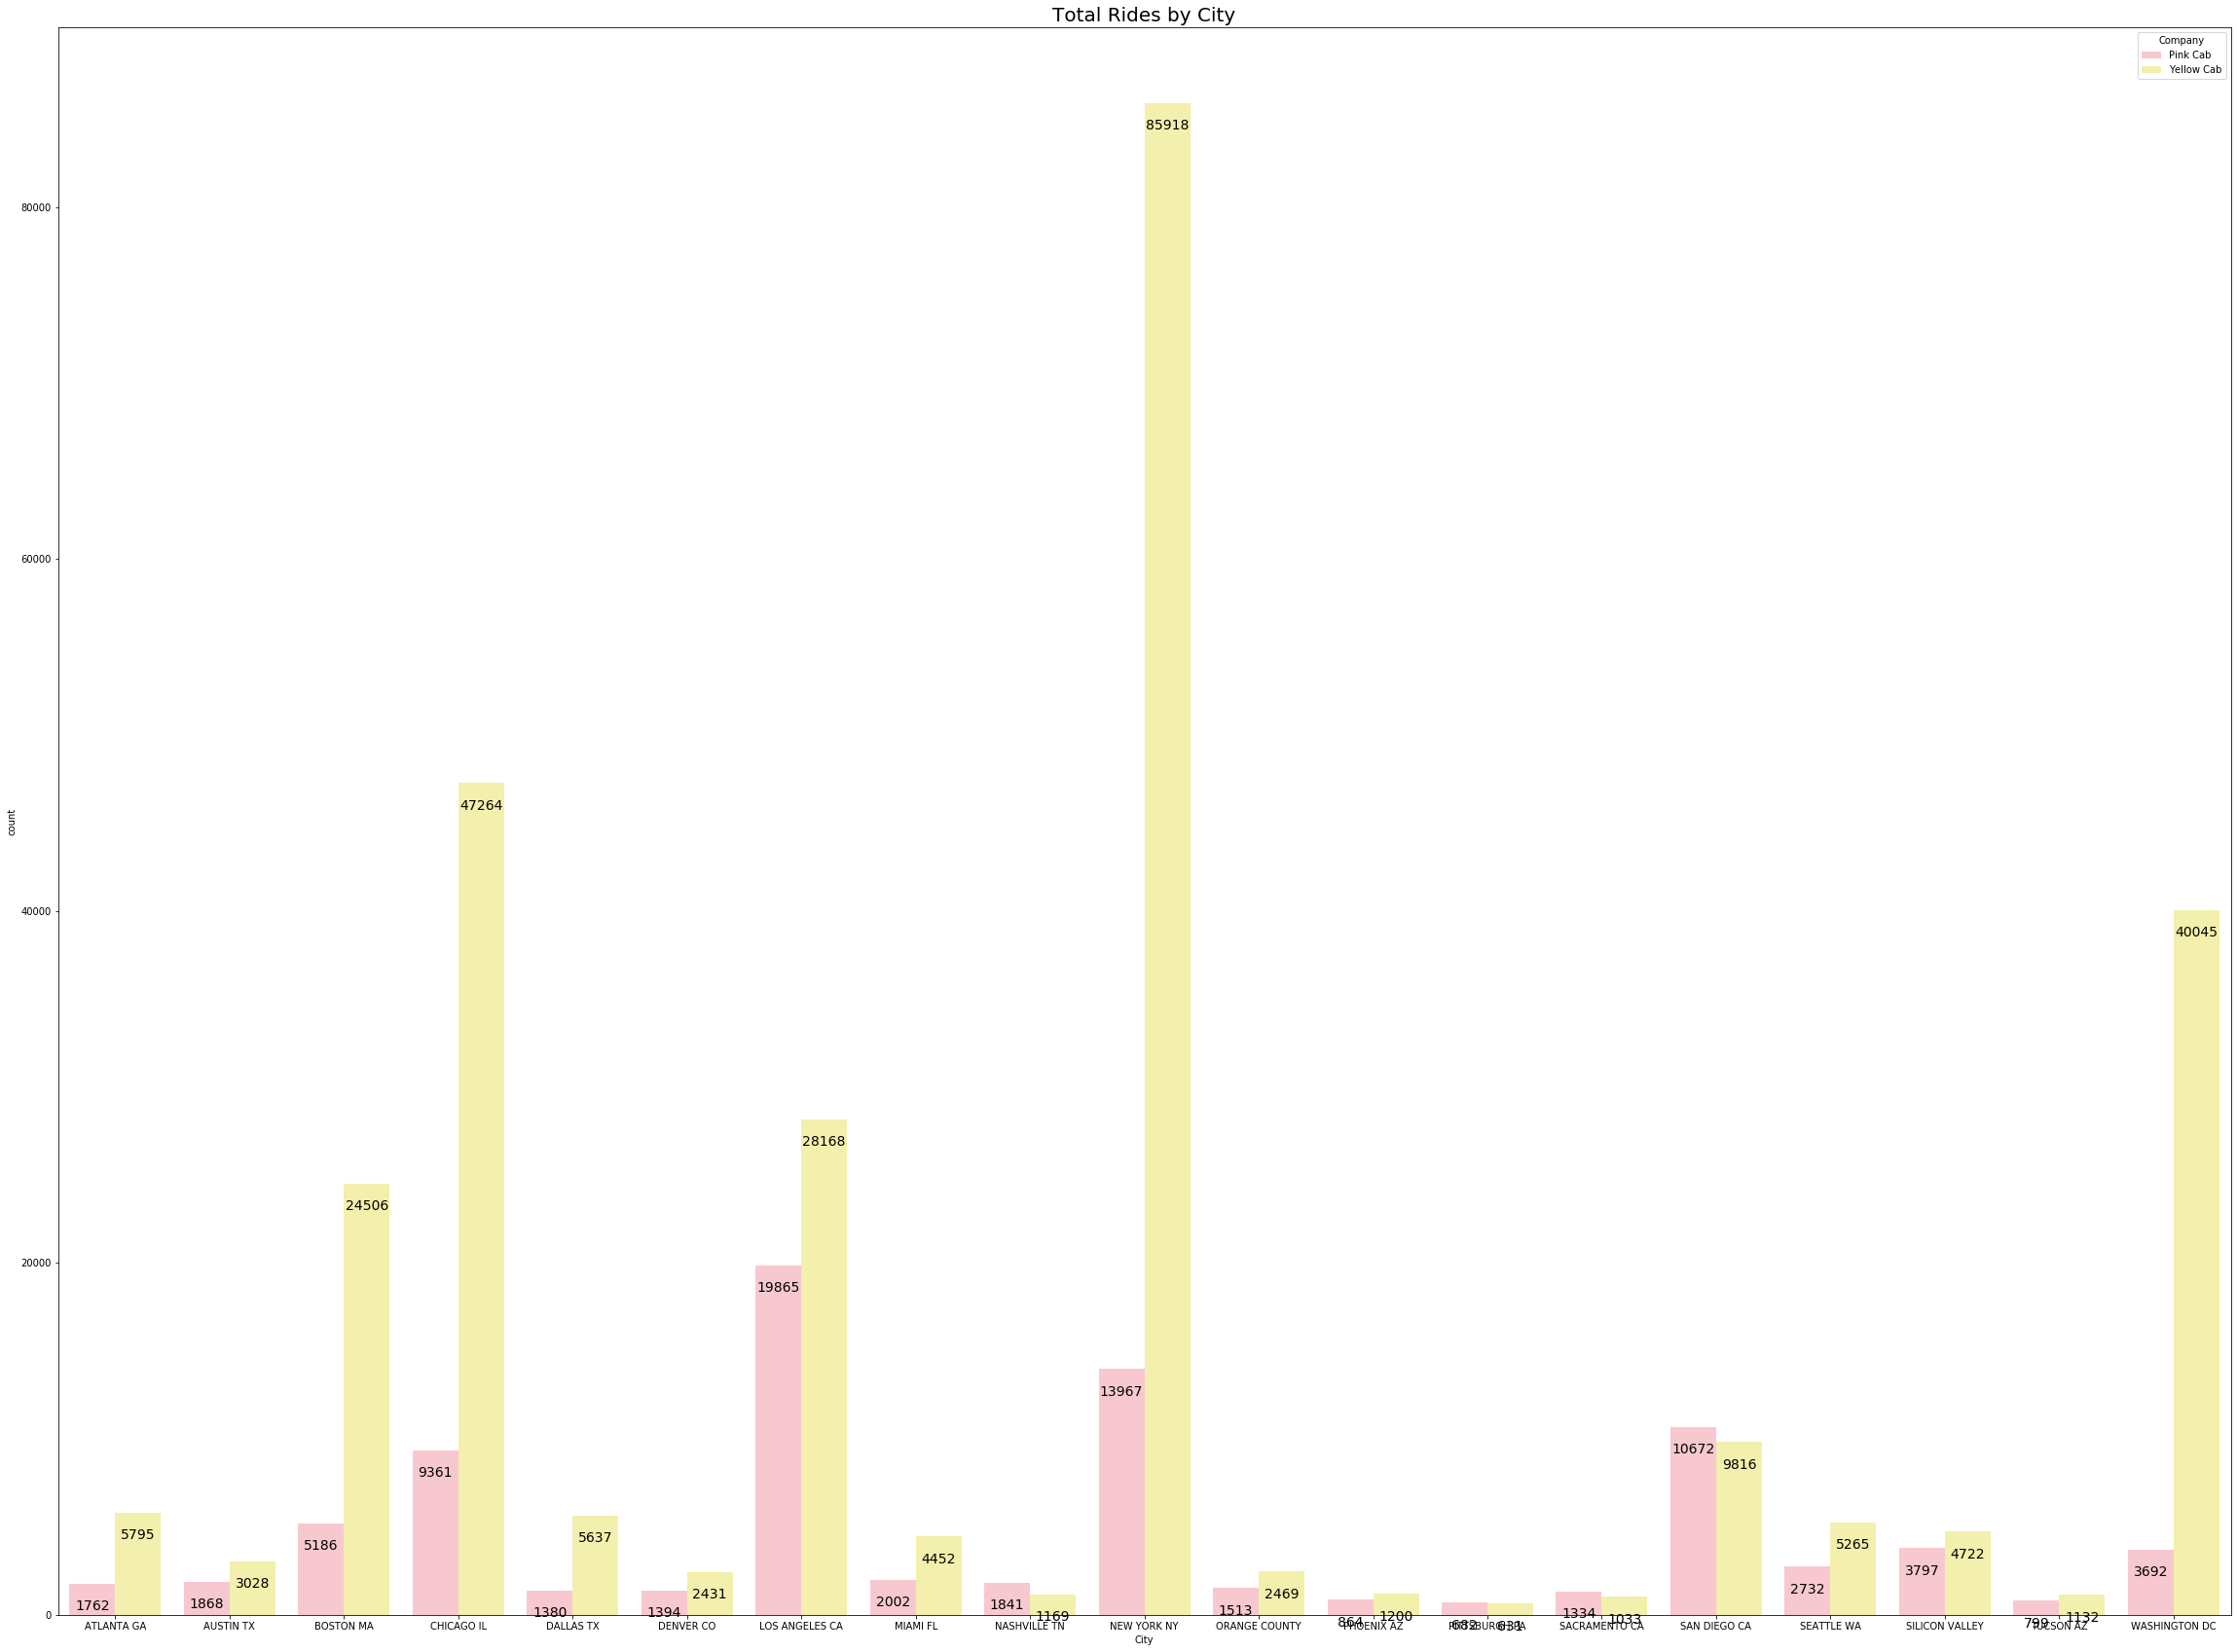

In [15]:
plt.figure(figsize=(40,30))

ax = sb.countplot(df['City'], hue="Company", data=df, palette=["#FFC0CB","#FFFAA0"])
ax.set_title("Total Rides by City", fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=14)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


Text(0, 0.5, '')

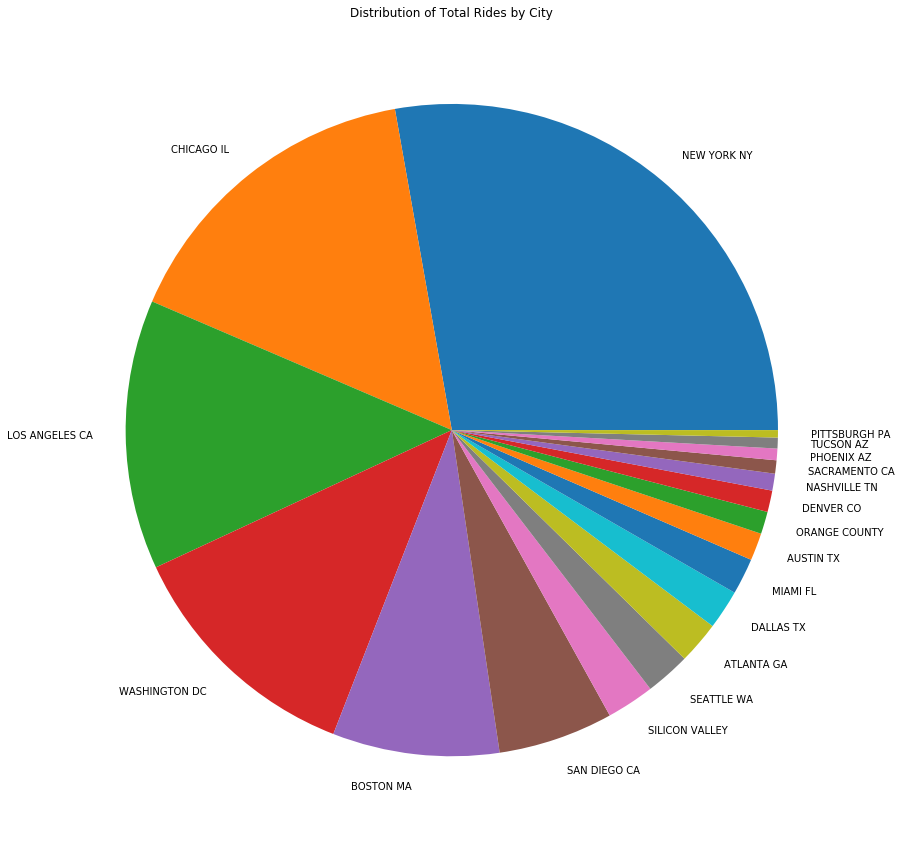

In [16]:
plt.figure(figsize=(15, 15))
plt.title("Distribution of Total Rides by City")
df["City"].value_counts().plot(kind = 'pie')
plt.axes().set_ylabel('')

## Profit

In [17]:
df["Profit"] = df["Price Charged"] - df["Cost of Trip"]
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Travel Date,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Profit
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-01-10,"814,885","24,701",29290,Male,28,10813,Card,57.315
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-01-08,"814,885","24,701",27703,Male,27,9237,Card,23.666
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-01-04,"814,885","24,701",28712,Male,53,11242,Cash,27.568
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-01-09,"814,885","24,701",28020,Male,23,23327,Cash,25.798
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016-01-05,"814,885","24,701",27182,Male,33,8536,Card,16.844


### Profit comparisons for Pink vs Yellow Cab

In [18]:
profitData = df.groupby("Company").mean()
profitData.head()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Profit
Company,,,,,,,,,
Pink Cab,1.022394e+07,42975.183435,22.559917,310.800856,248.148682,18422.581577,35.322414,15059.047137,62.652174
Yellow Cab,1.021978e+07,42960.640022,22.569517,458.181990,297.922004,19428.831732,35.341112,15045.669817,160.259986


In [19]:
companyData = df.groupby("Company").count()


companyData.head()

,Transaction ID,Date of Travel,City,KM Travelled,Price Charged,Cost of Trip,Travel Date,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Profit
Company,,,,,,,,,,,,,,,
Pink Cab,84711,84711,84711,84711,84711,84711,84711,84711,84711,84711,84711,84711,84711,84711,84711
Yellow Cab,274681,274681,274681,274681,274681,274681,274681,274681,274681,274681,274681,274681,274681,274681,274681


In [20]:
companyData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Pink Cab to Yellow Cab
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Transaction ID      2 non-null      int64
 1   Date of Travel      2 non-null      int64
 2   City                2 non-null      int64
 3   KM Travelled        2 non-null      int64
 4   Price Charged       2 non-null      int64
 5   Cost of Trip        2 non-null      int64
 6   Travel Date         2 non-null      int64
 7   Population          2 non-null      int64
 8   Users               2 non-null      int64
 9   Customer ID         2 non-null      int64
 10  Gender              2 non-null      int64
 11  Age                 2 non-null      int64
 12  Income (USD/Month)  2 non-null      int64
 13  Payment_Mode        2 non-null      int64
 14  Profit              2 non-null      int64
dtypes: int64(15)
memory usage: 256.0+ bytes


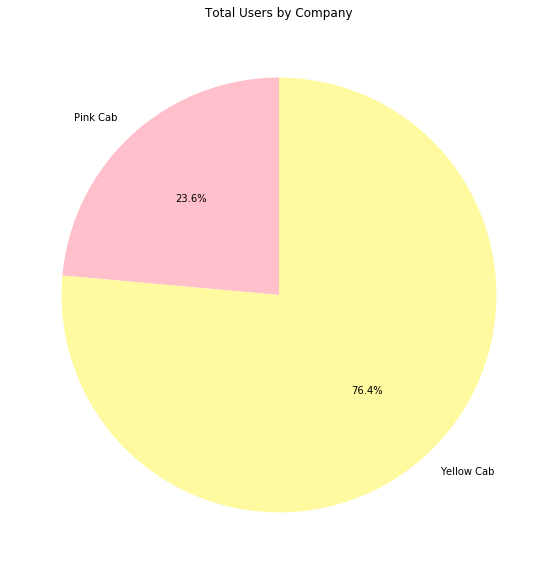

In [21]:
plt.figure(figsize=(10, 10))
plt.title("Total Users by Company")
plt.pie(companyData["Users"], labels=companyData.index, autopct='%1.1f%%', startangle=90, colors=["#FFC0CB","#FFFAA0"])
plt.show()

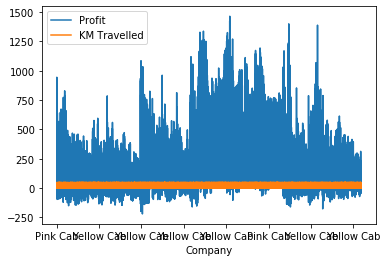

In [22]:
df.plot(x="Company", y=["Profit", "KM Travelled"])
plt.show()

In [23]:
pinkCab = df[df["Company"] == "Pink Cab"]
pinkCab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Travel Date,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Profit
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-01-10,"814,885","24,701",29290,Male,28,10813,Card,57.315
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-01-08,"814,885","24,701",27703,Male,27,9237,Card,23.666
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-01-04,"814,885","24,701",28712,Male,53,11242,Cash,27.568
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-01-09,"814,885","24,701",28020,Male,23,23327,Cash,25.798
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016-01-05,"814,885","24,701",27182,Male,33,8536,Card,16.844


In [24]:
yellowCab = df[df["Company"] == "Yellow Cab"]
yellowCab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Travel Date,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Profit
6,10000384,42371,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,2016-01-04,"814,885","24,701",27602,Male,23,8542,Card,877.0076
7,10000385,42378,Yellow Cab,ATLANTA GA,42.18,1412.06,516.2832,2016-01-11,"814,885","24,701",27594,Male,28,3901,Cash,895.7768
8,10000386,42372,Yellow Cab,ATLANTA GA,10.60,364.62,132.2880,2016-01-05,"814,885","24,701",27884,Male,32,13505,Cash,232.3320
9,10000387,42375,Yellow Cab,ATLANTA GA,26.75,838.00,333.8400,2016-01-08,"814,885","24,701",28533,Male,39,28386,Cash,504.1600
10,10000388,42376,Yellow Cab,ATLANTA GA,46.02,1540.61,596.4192,2016-01-09,"814,885","24,701",29039,Male,35,17761,Card,944.1908


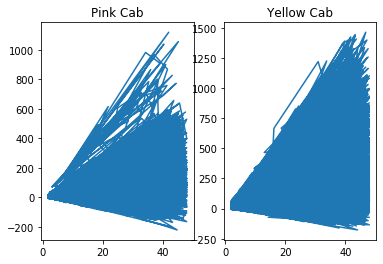

In [25]:
figure, (ax1, ax2) = plt.subplots(1, 2)
# For Pink Cab
ax1.plot(pinkCab["KM Travelled"], pinkCab["Profit"])
ax1.set_title("Pink Cab")
  
# For Yellow Cab
ax2.plot(yellowCab["KM Travelled"], yellowCab["Profit"])
ax2.set_title("Yellow Cab")

plt.show()

In [26]:
dummy=pinkCab.groupby("KM Travelled")


In [27]:
dummy.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Travel Date,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Profit
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-01-10,"814,885","24,701",29290,Male,28,10813,Card,57.315
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-01-08,"814,885","24,701",27703,Male,27,9237,Card,23.666
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-01-04,"814,885","24,701",28712,Male,53,11242,Cash,27.568
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-01-09,"814,885","24,701",28020,Male,23,23327,Cash,25.798
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016-01-05,"814,885","24,701",27182,Male,33,8536,Card,16.844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71269,10221908,42990,Pink Cab,CHICAGO IL,10.44,120.81,113.796,2017-09-14,"1,955,130","164,468",3957,Female,18,21647,Card,7.014
74510,10248911,43042,Pink Cab,CHICAGO IL,44.08,564.69,493.696,2017-11-05,"1,955,130","164,468",3507,Female,33,9899,Cash,70.994
77714,10274930,43079,Pink Cab,CHICAGO IL,7.28,79.84,86.632,2017-12-12,"1,955,130","164,468",5635,Female,55,22084,Card,-6.792
80844,10299632,43141,Pink Cab,CHICAGO IL,10.10,120.46,102.010,2018-02-12,"1,955,130","164,468",3364,Male,53,24430,Card,18.450


## Profit analysis per KM

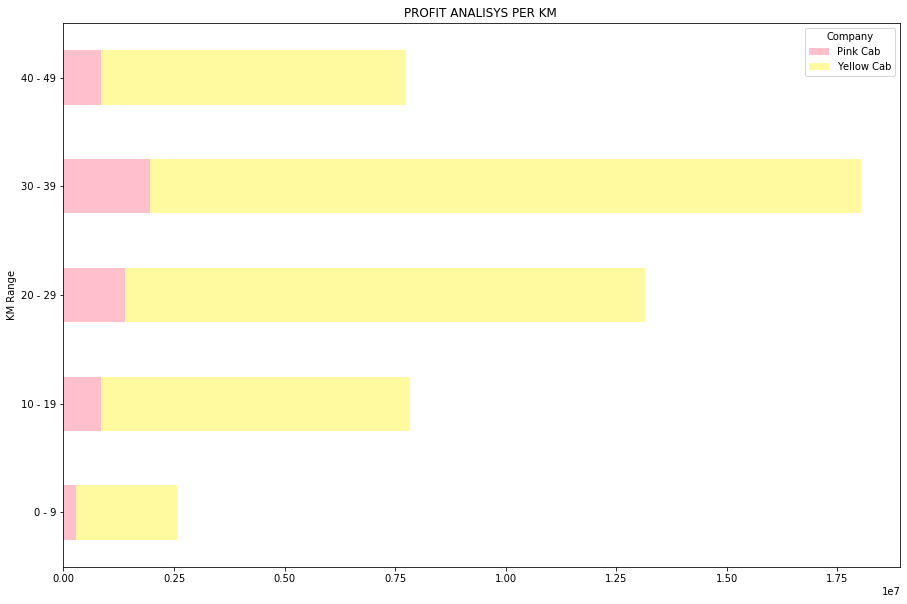

In [28]:
label = ["{0} - {1}".format(i, i + 9) for i in range(0, 50, 10)]

df["KM Range"] = pd.cut(df['KM Travelled'], range(0,55, 10), right=False, labels=label)

pivot_KM_profit = df.pivot_table(index = ["KM Range"], columns = 'Company', values = 'Profit', aggfunc = 'sum')

pivot_KM_profit.fillna(0, inplace=True)
ax = pivot_KM_profit.plot.barh(stacked = True, figsize = (15,10), color=["#FFC0CB","#FFFAA0"])
labels = []
for j in pivot_KM_profit.columns:
    for i in pivot_KM_profit.index:
        if ((j == 0) and (pivot_KM_profit.loc[i][j] < 10) and (pivot_KM_profit.loc[i][j] < sum(pivot_KM_profit.loc[i]))):
            label = ""
        else:                                                                                                                       
            label = str(round((pivot_KM_profit.loc[i][j]/sum(pivot_KM_profit.loc[i]))*100,1)) + "% "
        labels.append(label)


plt.title("PROFIT ANALISYS PER KM ")
plt.show()


## Cost of Trip and Price Charged Comparison

In [29]:
label_Cost = ["{0} - {1}".format(i, i + 49) for i in range(0, 700, 50)]

df["Cost of Trip Grouped"] = pd.cut(df['Cost of Trip'], range(0,710, 50), right=False, labels=label_Cost)
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Travel Date,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Profit,KM Range,Cost of Trip Grouped
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-01-10,"814,885","24,701",29290,Male,28,10813,Card,57.315,30 - 39,300 - 349
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-01-08,"814,885","24,701",27703,Male,27,9237,Card,23.666,20 - 29,300 - 349
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-01-04,"814,885","24,701",28712,Male,53,11242,Cash,27.568,0 - 9,50 - 99
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-01-09,"814,885","24,701",28020,Male,23,23327,Cash,25.798,30 - 39,350 - 399
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016-01-05,"814,885","24,701",27182,Male,33,8536,Card,16.844,0 - 9,50 - 99


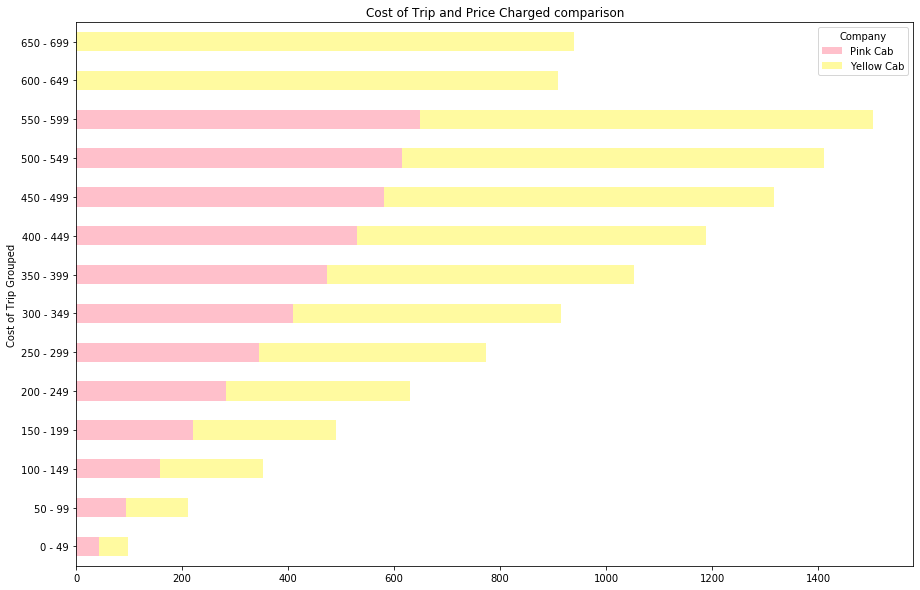

In [30]:
pivotCostTripPrice = df.pivot_table(index = ["Cost of Trip Grouped"], columns = 'Company', values = 'Price Charged')

pivotCostTripPrice.fillna(0, inplace=True)
ax = pivotCostTripPrice.plot.barh(stacked = True, figsize = (15,10), color=["#FFC0CB","#FFFAA0"])

plt.title("Cost of Trip and Price Charged comparison")
plt.show()

In [31]:
yellowCab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Travel Date,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Profit
6,10000384,42371,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,2016-01-04,"814,885","24,701",27602,Male,23,8542,Card,877.0076
7,10000385,42378,Yellow Cab,ATLANTA GA,42.18,1412.06,516.2832,2016-01-11,"814,885","24,701",27594,Male,28,3901,Cash,895.7768
8,10000386,42372,Yellow Cab,ATLANTA GA,10.60,364.62,132.2880,2016-01-05,"814,885","24,701",27884,Male,32,13505,Cash,232.3320
9,10000387,42375,Yellow Cab,ATLANTA GA,26.75,838.00,333.8400,2016-01-08,"814,885","24,701",28533,Male,39,28386,Cash,504.1600
10,10000388,42376,Yellow Cab,ATLANTA GA,46.02,1540.61,596.4192,2016-01-09,"814,885","24,701",29039,Male,35,17761,Card,944.1908


## Cost of trip for Gender in both Company

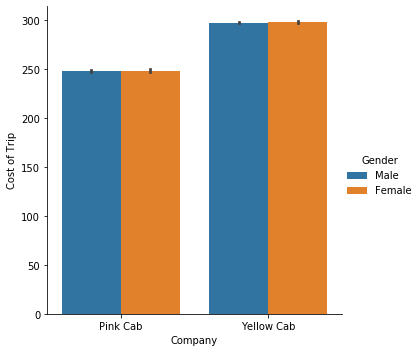

In [32]:
sb.catplot(x="Company", y="Cost of Trip", hue="Gender", kind="bar", data=df)

## Price Charged vs Cost of Trip for both Cab Companies

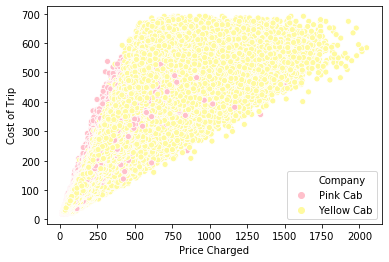

In [33]:
sb.scatterplot(x="Price Charged", y="Cost of Trip", hue="Company", data=df, palette=["#FFC0CB","#FFFAA0"])

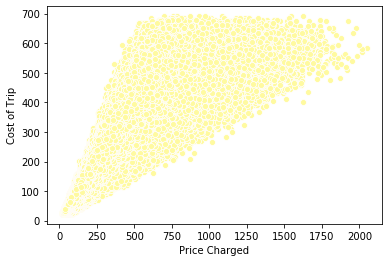

In [34]:
sb.scatterplot(x="Price Charged", y="Cost of Trip", data=yellowCab, color="#FFFAA0")

<Figure size 2160x2160 with 0 Axes>

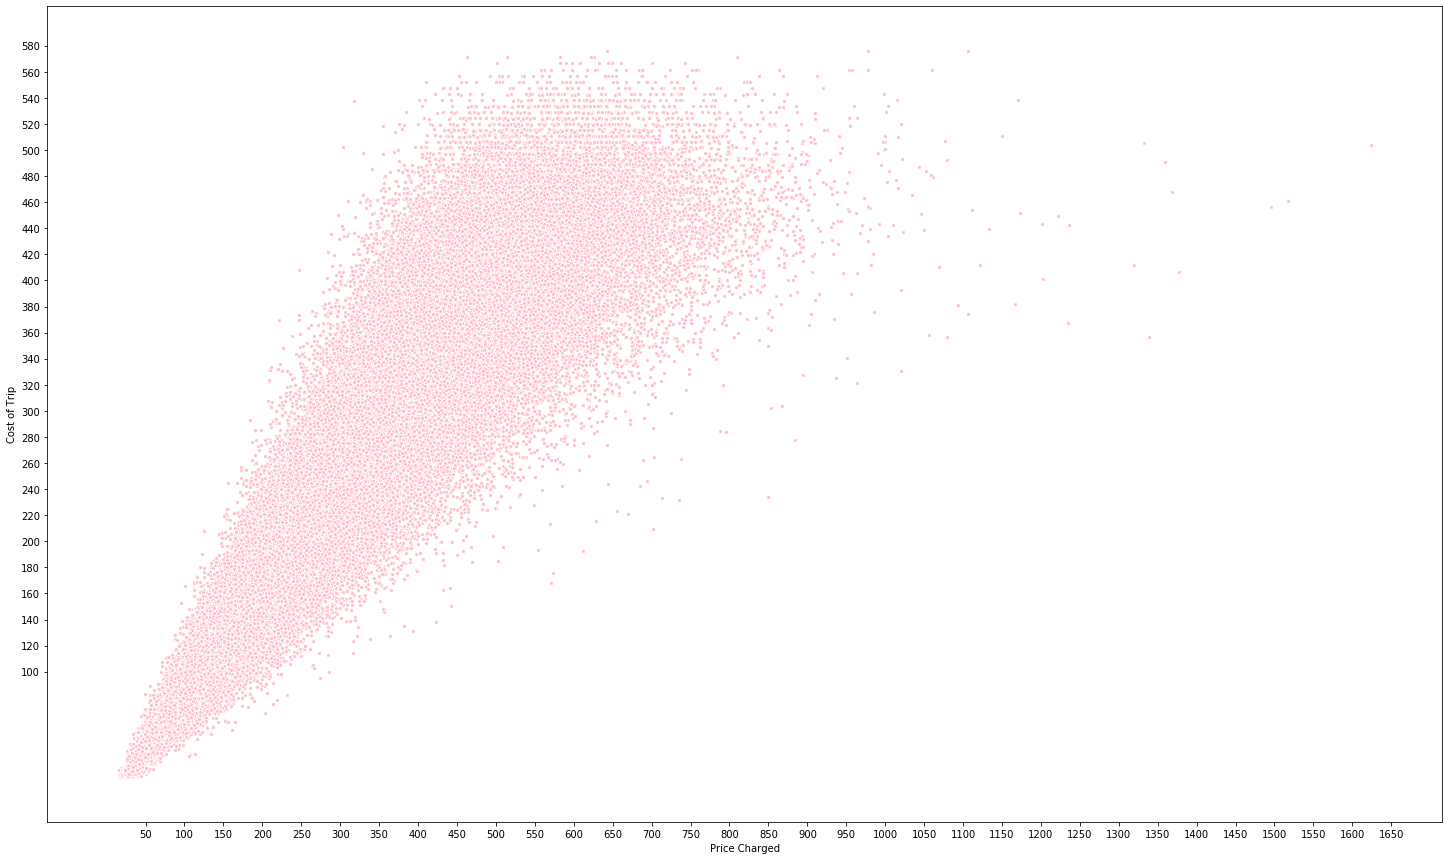

In [35]:
# sb.set(rc={'figure.figsize':(25,25)})
plt.figure(figsize=(30, 30))
fig, ax = plt.subplots()
ax.xaxis.set_ticks(np.arange(50, 1700, 50))
ax.yaxis.set_ticks(np.arange(100, 600, 20))
sb.scatterplot(x="Price Charged", y="Cost of Trip", data=pinkCab, s=15, color="pink")
fig.set_size_inches(25,15)
# ax.set(ylim=(1, 800))


<Figure size 2400x2400 with 0 Axes>

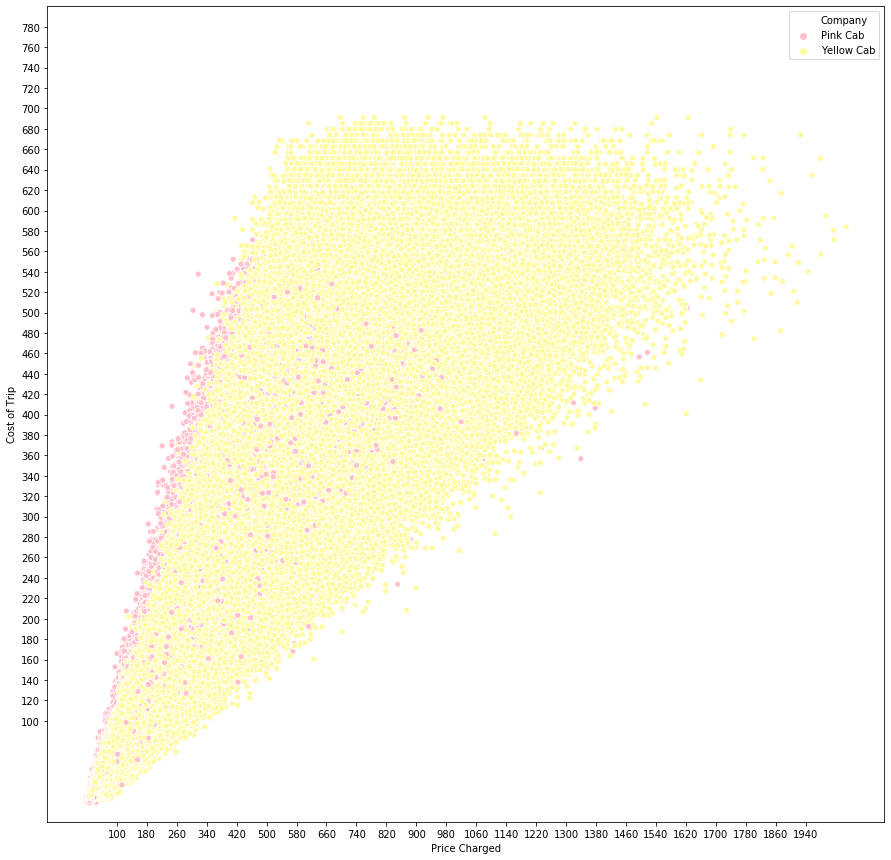

In [36]:
# sb.set(rc={'figure.figsize':(30,30)})
plt.figure(figsize=(30, 30), dpi=80)
fig, ax = plt.subplots()
sb.scatterplot(x="Price Charged", y="Cost of Trip", hue="Company", data=df, palette=["#FFC0CB","#FFFAA0"])
fig.set_size_inches(15,15)
ax.set(ylim=(1, 800))
ax.xaxis.set_ticks(np.arange(100, 2000, 80))
ax.yaxis.set_ticks(np.arange(100, 800, 20))

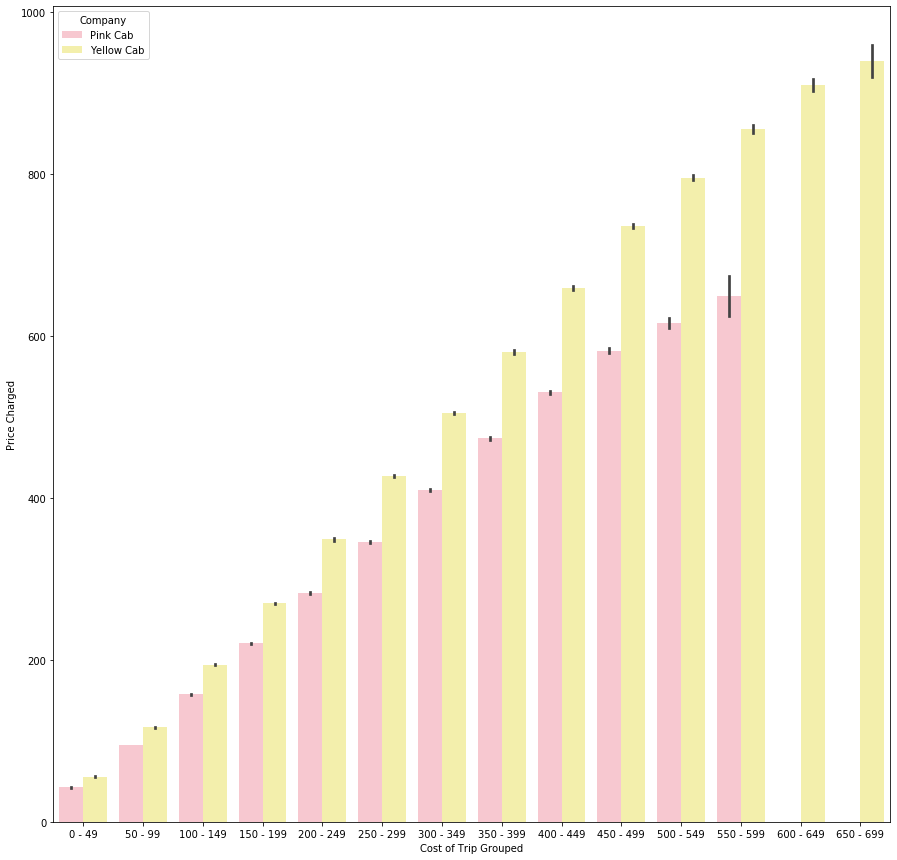

In [37]:
fig, ax = plt.subplots()
sb.barplot(x='Cost of Trip Grouped', y='Price Charged', data=df, palette=["#FFC0CB","#FFFAA0"], hue='Company')
fig.set_size_inches(15,15)

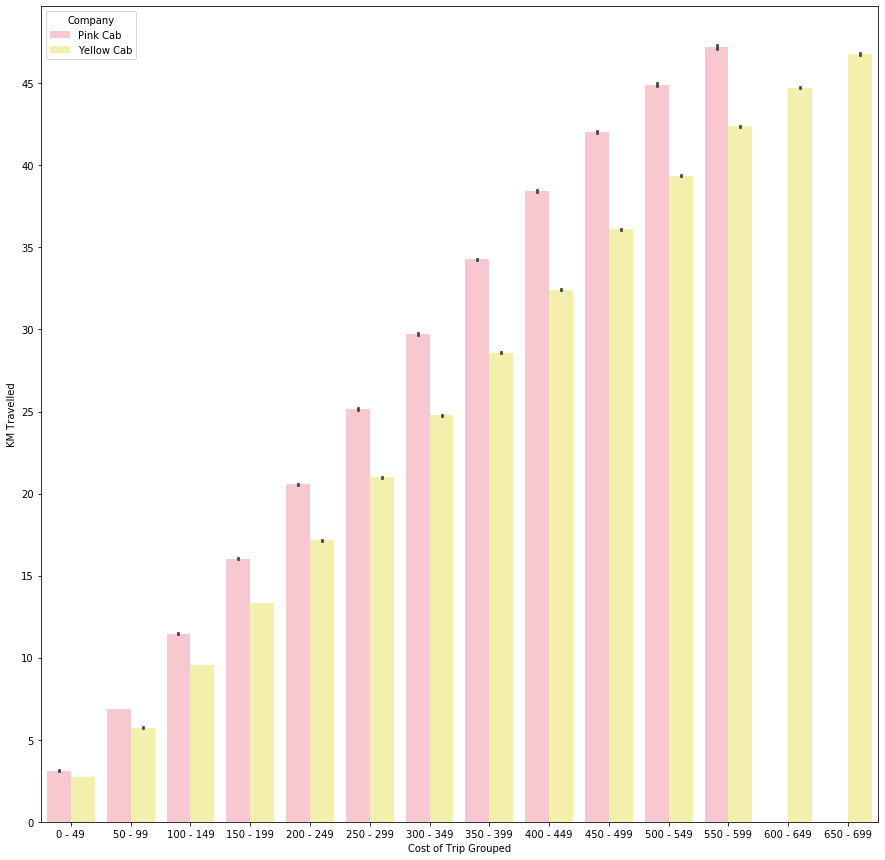

In [38]:
fig, ax = plt.subplots()
sb.barplot(x='Cost of Trip Grouped', y='KM Travelled', data=df, palette=["#FFC0CB","#FFFAA0"], hue='Company');
ax.yaxis.set_ticks(np.arange(0, 50, 5))
fig.set_size_inches(15,15)

## Hypothesis

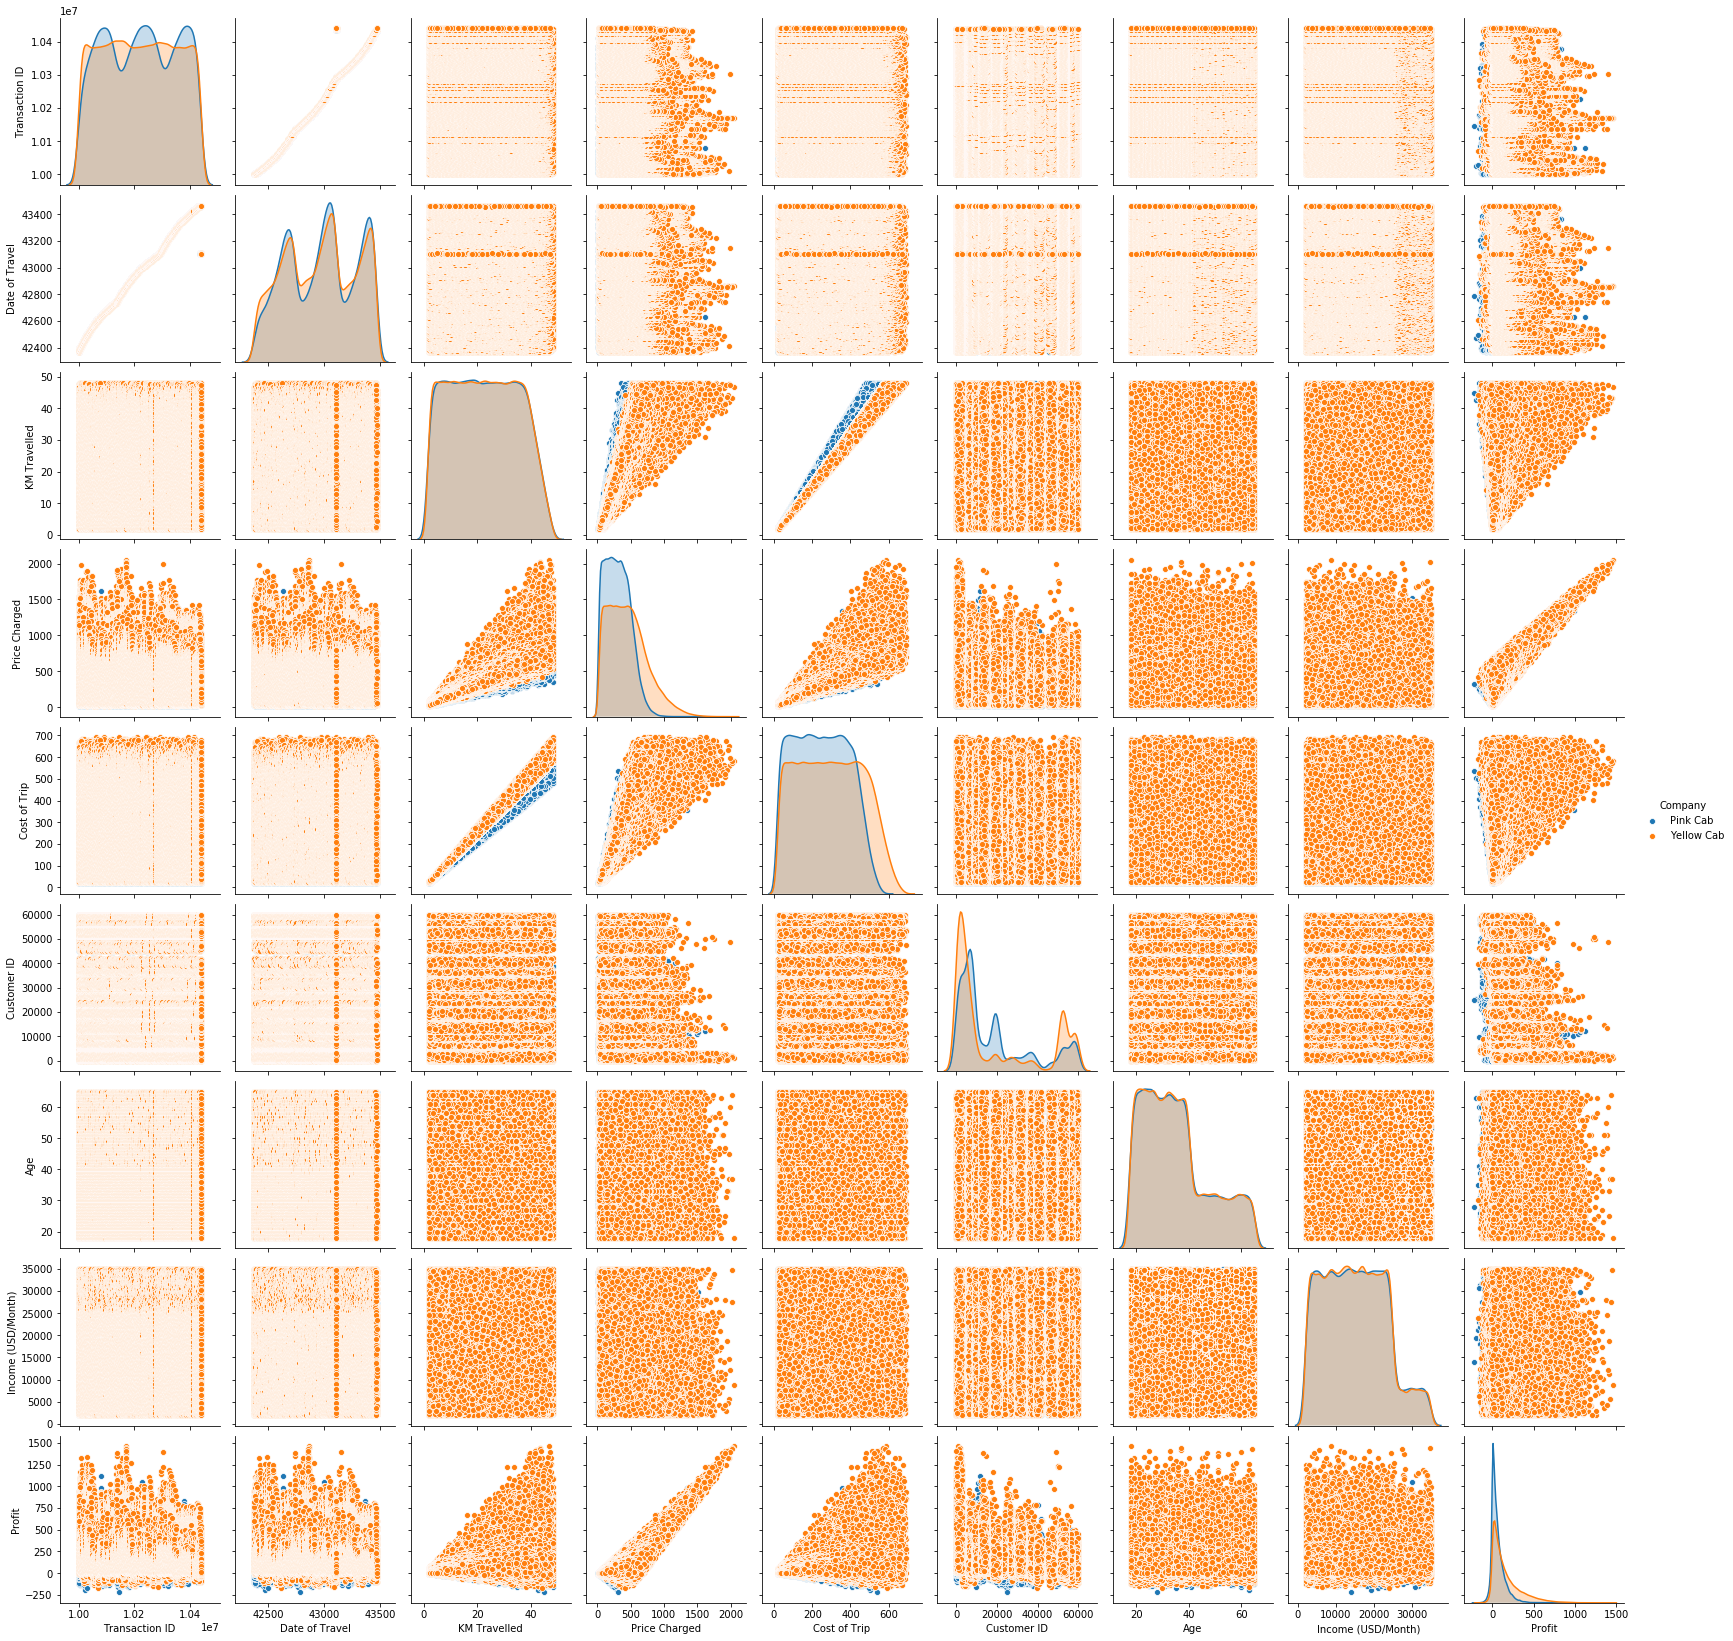

In [39]:
sb.pairplot(df, hue="Company")

## Regression Hypothesis 

### Regression Hypothesis for Price Charged and Profit for different Cab

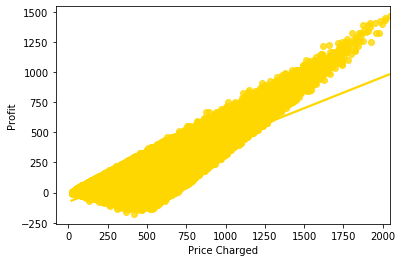

In [40]:
ax = sb.regplot(x="Price Charged", y="Profit", data=yellowCab, color="gold")

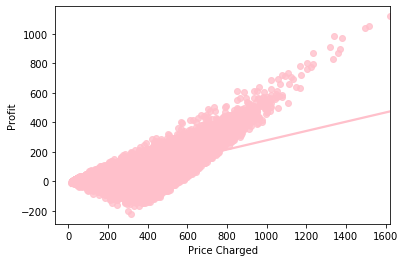

In [41]:
ax = sb.regplot(x="Price Charged", y="Profit", data=pinkCab, color="pink")

### Regression Hypothesis for Price charged and Cost of Trip for both Cab company

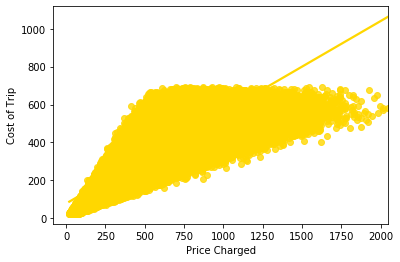

In [42]:
ax = sb.regplot(x="Price Charged", y="Cost of Trip", data=yellowCab, color="gold")

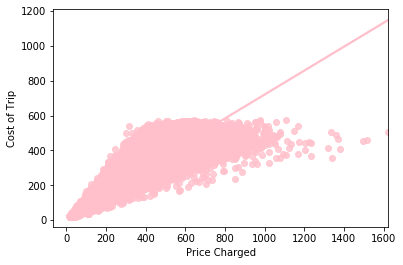

In [43]:
ax = sb.regplot(x="Price Charged", y="Cost of Trip", data=pinkCab, color="pink")

## CONCLUSION

#### The following evaluations have been made regarding both Cab companies:

1. Most Users (~77%) prefer travelling with Yellow cab than Pink cab
2. There are users who take long distance trip with Yellow Cab
3. Yellow cab more profit than what is made by both companies
4. Yellow cab has relatively more profit each year
5. Yellow cab charged higher than Pink cab

#### Thus Yellow Cab company is good for XYZ company to invest and expand it's business
